# Chapter 12. CNN - 이미지 분류를 응용한 문서 분류
* CNN (Convolutional Neural Network)
    * 이미지 인식에 탁월한 효과를 보이는 딥러닝 신경망
    * 문서 분류에서 뛰어난 효과 보임, 텍스트 마이닝에서도 활발하게 쓰임 
    * 최근, BERT가 압도적으로 많이 사용됨 
        * BERT + CNN 결합한 모형 제안 

* CNN의 개념 
* CNN을 이용한 문서 분류의 원리 이해 
* NLTK 영화 리뷰 대상으로 문서 분류 실습 

## 1. CNN의 등장과 작동 원리
* CNN
    * ImageNet이라는 이미지 데이터베이스 이용해 매년 열린 ILSVRC(ImageNet Large Scale Visual Recognition Challenge), 2012년에 우승 
    * CNN이전, 이미지 인식에 유용한 특성 도출, 이미지 분류에 이용 
    * CNN, 딥러닝 기반 학습 이용해 26% 오류율 -> 16% 로 떨어짐 
    * CNN 기반 알고리즘 2017년 (사람: 5%)보다 낮은 2.3%

* 이미지 인식 
    * 주변 정보 함께 인식 
    * 흑백 이미지 / 그레이 스케일 이미지는 픽셀로 이루어진 2차원 행렬 
    * 숫자 8-> 2차원 행렬로 변형 
    * 기존의 머신러닝 기법 -2차원 행렬 값 -> 1차원으로 펼침 
    * 즉, CNN 
        * --> 2차원 행렬로부터 주변 정보를 요약해 
        * 이미지를 분류할 수 있는 특성들을 추출하는 딥러닝 기법 
        * 단, 컬로 이미지의 경우 
            * RGB에 해당하는 세 가지 색상에 대해 각각 2차원 행렬
            * 3차원 행렬로 한 장의 이미지 표현

* CNN 이미지 인식 원리
    * Convolution + ReLU
    * Pooling
    * Convolutioional + ReLU
    * Pooling
    * Fully Connected 
    * Fully Connected
    * Output Predictions  

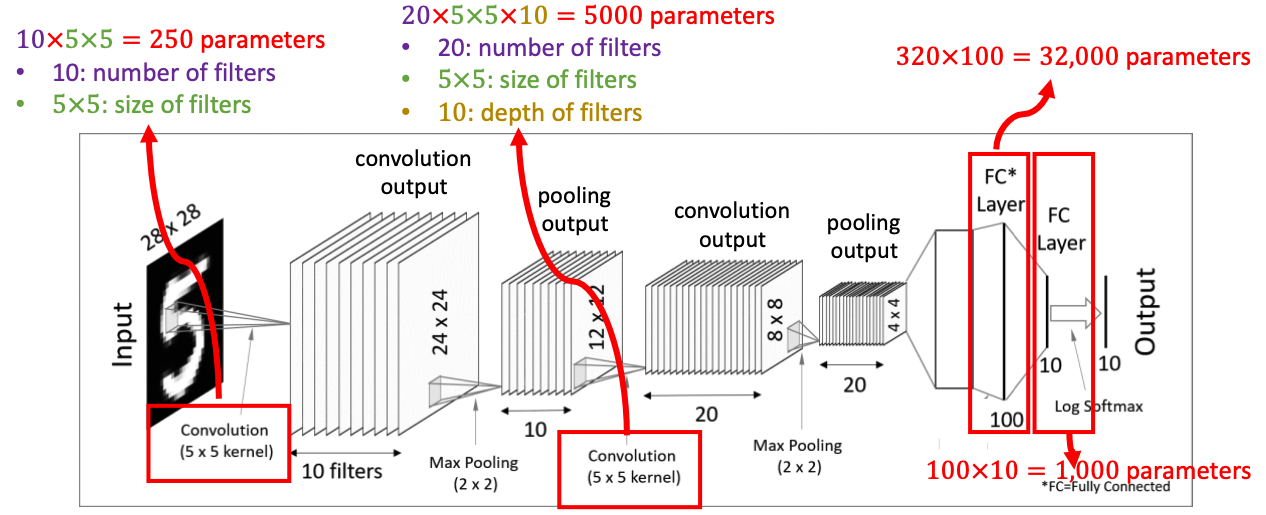

In [5]:
from IPython.display import Image 
Image('./img/ch12/cnn.PNG')

* CNN
    * 주변 정보들을 요약하고 특성을 추출하는 단계 
    * 1) 컨볼루션 (Convolution)
        * 원본 이미지에 필터를 적용해 주변 정보를 요약
        * 필터: 원본 이미지보다 작은 2차원 행렬로 학습의 대상이 되는 파라미터 
        * 3x3, 5x5 의 크기를 많이 사용 
        * 이 필터를 이미지 위로 이동하면서 필터의 크기에 해당하는 이미지 값들, 하나의 값으로 요약 
        * 컨볼루션 -> 주변 정보를 요약한 새로운 2차원 행렬 만들어짐 
        * 필터, 즉, 파라미터의 값에 따라 요약 정보 달라짐
        * 필터/채널의 수 
            * 필터의 수 여러개 가능 
            * 서로 다른 값을 가지는 두 개의 필터를 이용해 두 개의 요약된 2차원 행렬 만들 수 있음 
            * 즉, 하나의 이미지-> 두 개의 서로 다른 요약 정보 추출 
        * 하이퍼파라미터 
            * 필터의 크기 
            * 필터/ 채널의 수 
            * 스트라이드(stride)
                * 필터를 이미지 위에 이동할 때의 간격
            * 패딩(padding)
                * 컨볼루션의 결과로 생성된 2차원 행렬의 크기, 원본 이미지의 크기와 다를 때 0으로 채울지 결정하는 옵션     
    * 2) 풀링(Pooling)
        * 요약된 2차원 행렬을 축소하는 단계 
        * 맥스풀링(maxpooling)
            * 필터의 크기 2x2 
            * 원본 이미지를 이 필터 단위로 자르고 
            * 각 필터 범위 안에 있는 네 값 중, 가장 큰 값 하나를 추출해 -> 새로운 2차원 행렬 만ㄷ름 
            * 이미지 너비가 1/4로 줄어든 요약정보 만들어짐 
        * 파라미터 없이 이미지 축소 
        * 학습 속도 느려지지 않고
        * 모형이 이미지의 미세한 이동이나 변형, 왜곡에 강한 특성을 갖게 함
    * CNN 은 1) Convolution 2) Pooling 반복하며 점차 이미지의 정보를 축약하는 특성 만들어냄 
    * 모형의 마지막 단계, 그 특성들을 이용해 이미지를 판별 
    * 전체 신경망 모형에서 이미지 판별하는 부분 분류기(classifier)
    * 분류기는 보통 여러 층의 완전 연결(fully connected) 계층으로 구성 
    * 앞 단의 요약정보 이용해, 최종적으로 이미지 분류를 예측  

## 2. CNN을 이용한 문서 분류


### 2.1 CNN을 이용한 문서 분류의 원리
* 텍스트 마이닝(딥러닝) -> 문맥의 파악 
* RNN: 앞 단어들이 다음 단어에 미치는 영향을 신경망 내에 표현
* CNN: 이미지 판별하기 위해 주변 정보를 요약 
    * 즉, 단어들의 연속된 나열에 대해 앞뒤 단어들 간의 주변 정보 요약 
    * 문맥 파악이 가능
* RNN과 같이 단어 단위로 벡터를 만듦 
    * 문서는 1차원 벡터인 단어의 나열로 이루어진 -> 2차원 행렬 
    * 모양이 2차원 이미지와 유사해짐 
    * 이미지 vs 문서의 차이 
        * 문서에서 : 단어들의 나열을 보기 위해
        * 2차원 -> 1차원 방향으로 필터 이동하며 컨볼루션 수행  
        * 이미지에서의 필터 이동 
            * 행& 열 방향으로 자유롭게 이루어짐 
            * 이미지의 크기 커서 좌우, 위아래 필터 이동 
            * 필터 단위로 주변 정보들 요약 
        * 문서에서의 필터 이동 
            * 단어들 간의 주변 정보를 요약하려면 
            * 그림과 같이 필터의 열 수를 단어 벡터의 수와 같게 하고 
            * 단어 나열 방향에 따라 필터를 아래로만 이동, 주변 정보 요약 
            * --> Conv2D 대신 -> 한방향으로 움직이는 Conv1D 계층 씀 

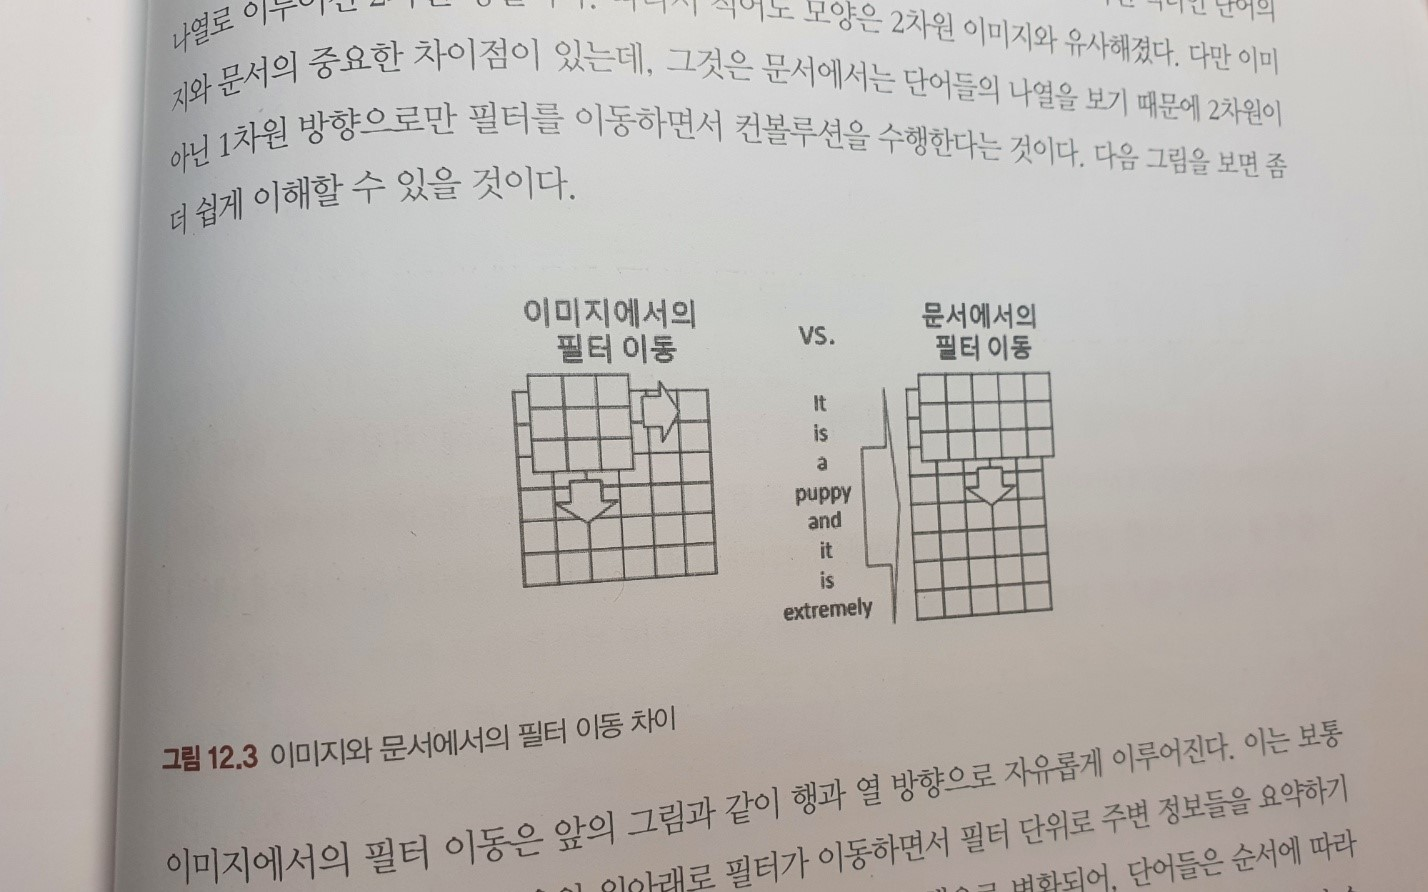

In [10]:
from IPython.display import Image 
Image('./img/ch12/cnn_conv.jpg')

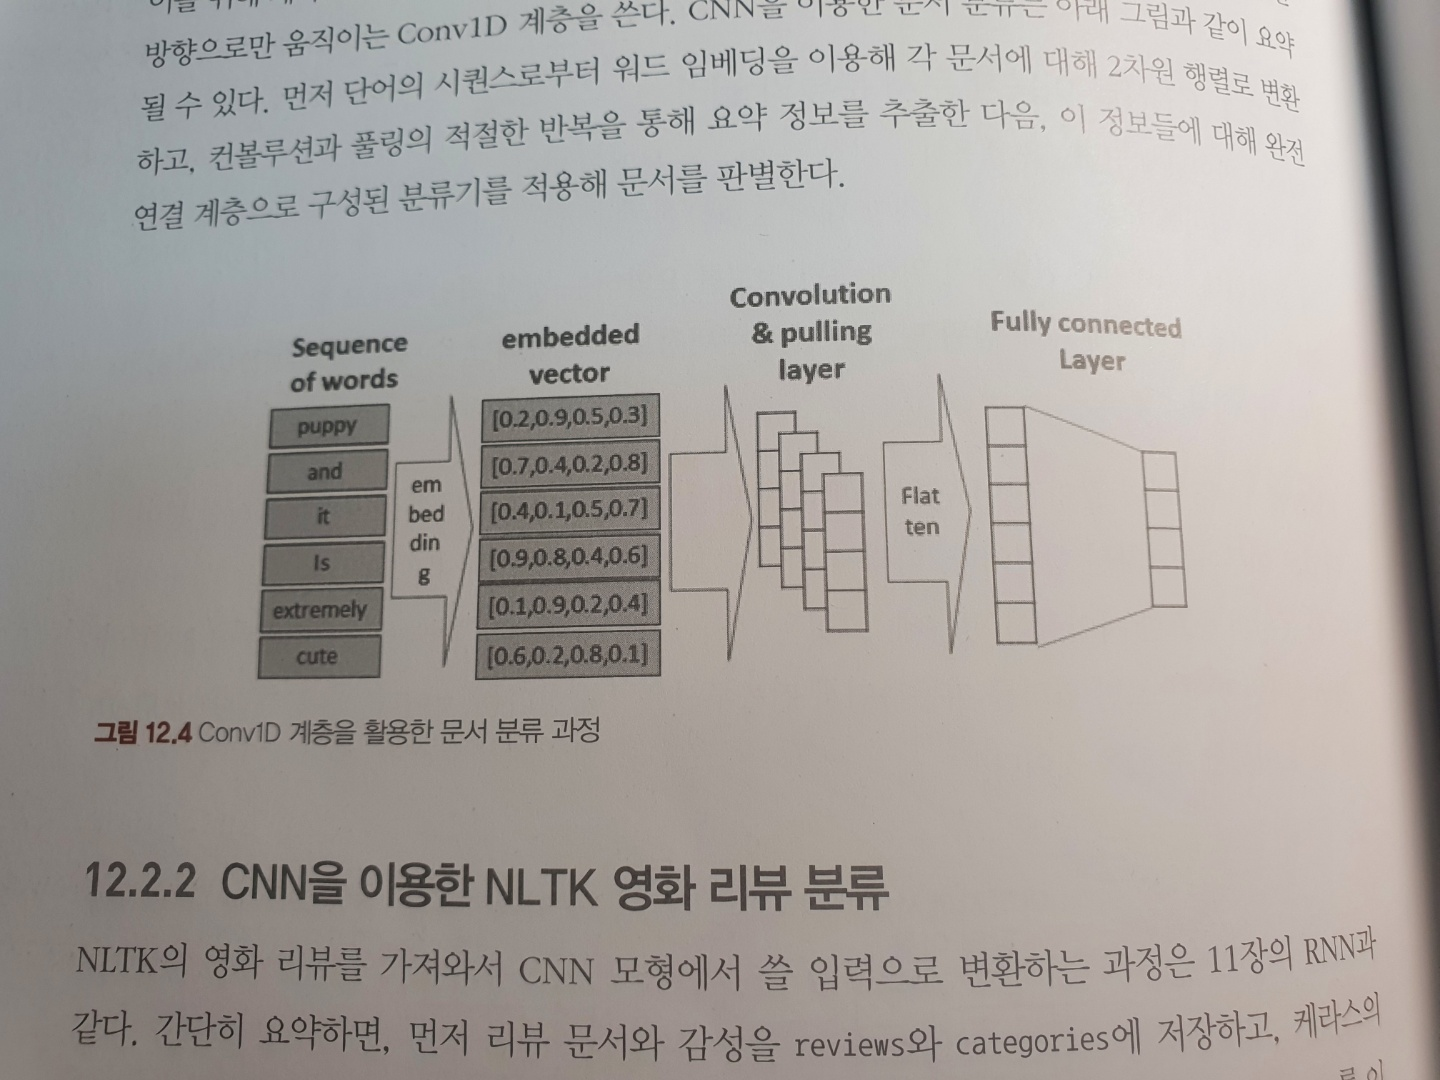

In [9]:
#------------------------------------------
# 한 방향으로만 움직이는 Conv1D 사용 
# CNN 활용한 문서 분류 
    # 먼저, 단어의 시퀀스로부터 워드 임베딩 이용해 각 문서에 대해 2차원 행렬로 변환 
    # 컨볼루션, 풀링 반복을 통해 요약 정보 추출 
    # 이 정보들에 대해 완전 연결 계층으로 구성된 분류기를 적용해 문서를 판별 
#------------------------------------------
from IPython.display import Image 
Image('./img/ch12/cnn_conv1d.jpg')

### 2.2 NLTK 영화 리뷰 데이터 변환



In [1]:
#------------------------------------------
# NLTK 영화 리뷰 가져와 CNN 모형 입력으로 변환 (11장 RNN과 비슷)
# 리뷰 문서, 감성을 reviews, categories에 저장 
# 케라스의 Tokenizer를 이용해 단어에 대한 인덱스의 시퀀스로 문서를 변환 
# pad_sequences를 이용해 문서의 크기를 일정하게 변환 
# 라벨을 변환한 후
# train_test_split 이용해 데이터를 학습 집합, 테스트 집합으로 분리 
#------------------------------------------
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split 

#movie review data에서 file id를 가져옴
fileids = movie_reviews.fileids() 
#file id를 이용해 raw text file을 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] 
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 #사용할 단어의 수
maxlen = 500 #문서의 단어 수를 제한

# 빈도가 높은 10000개의 단어를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK') 
tokenizer.fit_on_texts(reviews) #단어 인덱스 구축

X = tokenizer.texts_to_sequences(reviews) #만들어진 단어 인덱스를 이용해 변환
X = pad_sequences(X, maxlen=maxlen, truncating='pre') 

# label을 0, 1의 값으로 변환
label_dict = {'pos':0, 'neg':1}
y = np.array([label_dict[c] for c in categories])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### 2.2 CNN 모형 생성 및 학습



In [2]:
#------------------------------------------
# CNN 모형 생성 
        # 워드 임베딩 곛으을 추가 
        # 컨볼루션과 풀링 (2회 반복)
                # 1) 첫번째 컨볼루션 층 Conv1D 
                        # 채널의 수 128, 필터의 크기 5 
                        # 이미지와 달리, 필터의 크기는 하나의 값만 줌 
                        # 스트라이드 1로 지정해 필터가 한 단어씩 이동하게 함 
                        # padding 옵션은: 'valid', 패딩 X 
                        # 'same'을 섵택하면 원본과 같은 크기가 되도록 패딩함 
                        # 활성화 함수
                                # relu 
                # 1) MaxPooling1D
                        # 기본값(필터의 크기 2)
                        # 단어의 수가 절반으로 줄어드는 결과 
                # 2) 두번째 컨볼루션 층 
                        # 채널만 256으로 바꿈 
                # 2) 풀링층 그대로 기본값 
        # model.summary()
                # 단어 임베딩 결과가 하나의 문서가 500 x 64 크기의 2차원 행렬 
                # Conv1D 층과 연결 
                        # 단어의 벡터 크기: 채널로 작동 
                        # 즉, 벡터 크기 64개 채널이 Conv1D 통해 두배인 128개로 늘어남 
                # Flatten()
                        # 분류기 입력으로 사용하기 위해 2차원 ->1차원 
                # 완전연결층
                        # 긍정/부정 판별                                   
#------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    #word embedding layer 생성
    Embedding(max_words, 64, input_length=maxlen), 
    Conv1D(128, # 채널의 수
            5, # 1D 필터 크기
            padding='valid', 
            activation='relu',
            strides=1), 
    MaxPooling1D(),
    Conv1D(256, # 채널의 수
            5, # 1D 필터 크기
            padding='valid', 
            activation='relu',
            strides=1), 
    MaxPooling1D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') #binary logistic regression을 수행
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          41088     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 248, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 244, 256)          164096    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 122, 256)          0         
_________________________________________________________________
flatten (Flatten)            (None, 31232)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [3]:
#------------------------------------------
# 모형이 완성됐으면, 학습 데이터에 대해 학습을 수행 
# RNN과 마찬가지로 adam 씀, 손실 함수 : binary_crossentropy 
#------------------------------------------
adam = Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=256,
                    verbose=0,
                    validation_split=0.2)

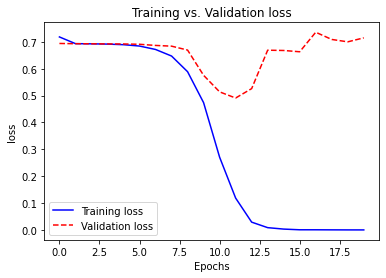

13/13 [==============================] - 0s 17ms/step - loss: 0.6965 - acc: 0.8175
#Test accuracy:0.817


In [4]:
#------------------------------------------
# CNN에 의한 학습 결과 
    # RNN과 달리 정확도 대신 손실값으로 그래프 그림 
    # 딥러닝, 일반적으로 손실값의 변화를 보며, 학습의 추이 살펴봄 
    # 학습 손실이 위와 같이 시그모이드 함수의 좌우 반전된 모습과 같은 형태로 그려짐
        # 학습 데이터에 대한 학습 이상적 
    # 다만, 검증 데이터에 대한 손실값 
        # 일정하게 떨어지지 못하고, 오르락내리락 함 
        # 이런 경우, 적절한 에포크 수를 정하기 쉽지 않음 
        # 테스트 데이터에 대한 정확도 -> RNN 에 비해 우수한 81.2% 
        # CNN 도 RNN 못지 않은 성능을 보임 

        # 500개나 되는 단어들로 문서가 이루어져 있을때
        # 다 연결해서 문맥을 파악하는 것이 더 효과적인지 
        # 다섯 단어 정도로 끊어가며, 좁은 범위에서 주변의 문맥 파악하고 
        # 그 결과를 다시 합쳐가는 것이 더 효율적인지에 대한 물음 
#------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'loss')

#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')